# Car Price Prediciton

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [250]:
car=pd.read_csv('car.csv')
car.head()

,Unnamed: 0,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [251]:
car.shape

(205, 27)

In [252]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        205 non-null    int64  
 1   car_ID            205 non-null    int64  
 2   symboling         205 non-null    int64  
 3   CarName           205 non-null    object 
 4   fueltype          205 non-null    object 
 5   aspiration        205 non-null    object 
 6   doornumber        205 non-null    object 
 7   carbody           205 non-null    object 
 8   drivewheel        205 non-null    object 
 9   enginelocation    205 non-null    object 
 10  wheelbase         205 non-null    float64
 11  carlength         205 non-null    float64
 12  carwidth          205 non-null    float64
 13  carheight         205 non-null    float64
 14  curbweight        205 non-null    int64  
 15  enginetype        205 non-null    object 
 16  cylindernumber    205 non-null    object 
 1

In [253]:
car.isnull().sum()

Unnamed: 0          0
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [254]:
car.describe()

,Unnamed: 0,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,102.000000,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,0.000000,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,51.000000,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,102.000000,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,153.000000,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,204.000000,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


###  price Distribution Graph

C:\Users\Affex Jain\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


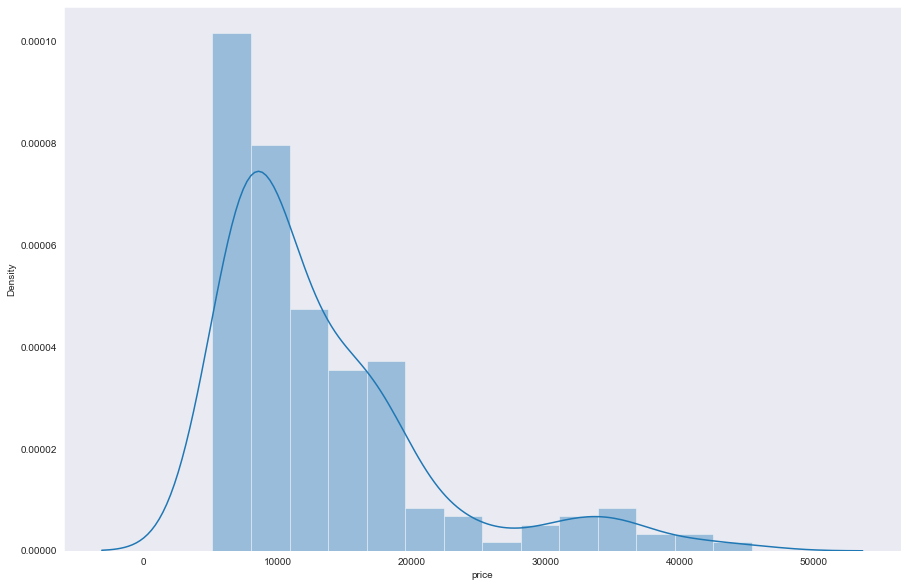

In [255]:
sns.set_style("dark")
plt.figure(figsize=(15, 10))
sns.distplot(car.price)
plt.show()

In [256]:
car.corr()

,Unnamed: 0,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
Unnamed: 0,1.000000,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
car_ID,1.000000,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173


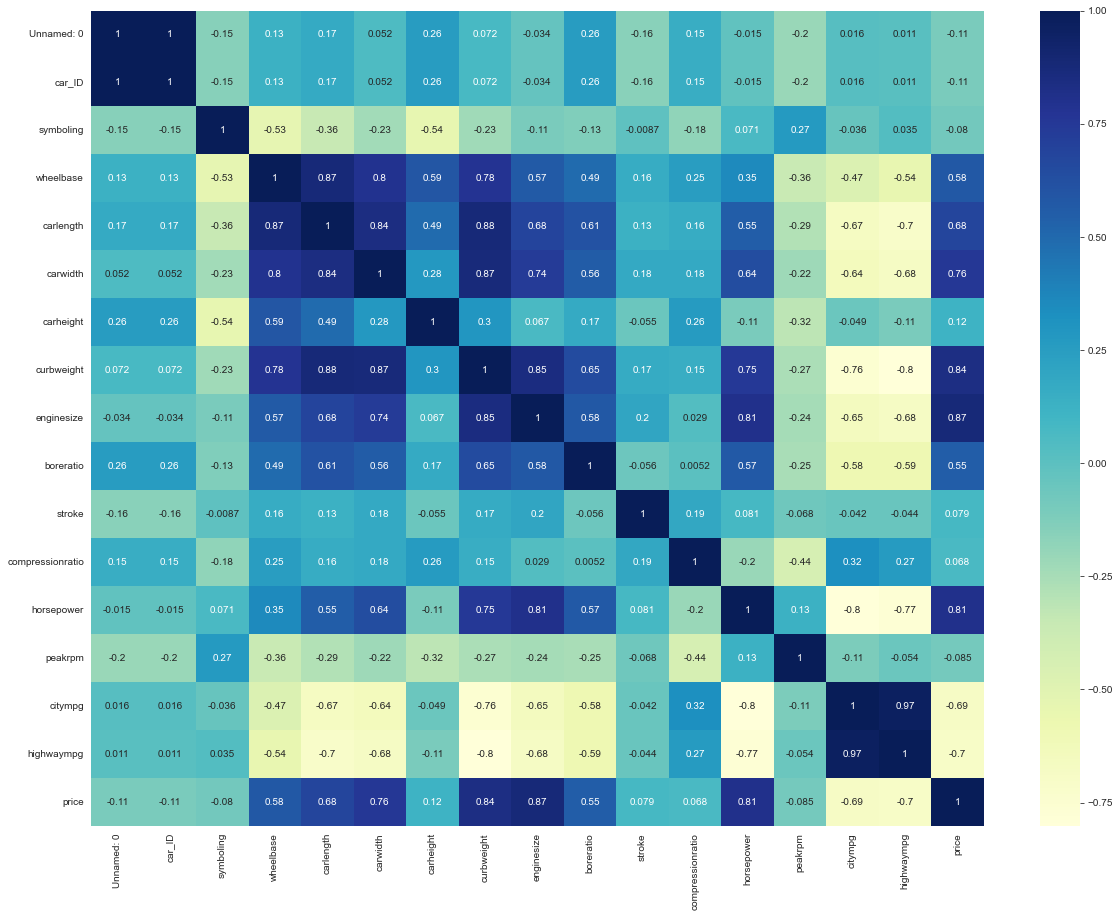

In [257]:
plt.figure(figsize=(20, 15))
sns.heatmap(car.corr(), cmap="YlGnBu", annot=True)
plt.show()

#### Important Cloumns 

In [258]:
car = car[["symboling", "wheelbase", "carlength", 
             "carwidth", "carheight", "curbweight", 
             "enginesize", "boreratio", "stroke", 
             "compressionratio", "horsepower", "peakrpm", 
             "citympg", "highwaympg", "price"]]

In [259]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   wheelbase         205 non-null    float64
 2   carlength         205 non-null    float64
 3   carwidth          205 non-null    float64
 4   carheight         205 non-null    float64
 5   curbweight        205 non-null    int64  
 6   enginesize        205 non-null    int64  
 7   boreratio         205 non-null    float64
 8   stroke            205 non-null    float64
 9   compressionratio  205 non-null    float64
 10  horsepower        205 non-null    int64  
 11  peakrpm           205 non-null    int64  
 12  citympg           205 non-null    int64  
 13  highwaympg        205 non-null    int64  
 14  price             205 non-null    float64
dtypes: float64(8), int64(7)
memory usage: 24.1 KB


#####  All int or float so need of encoders.

In [260]:
X=np.array(car.drop(columns=['price']))
y=np.array(car.price)

###  Model Training

In [261]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [262]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [263]:
y_pred=model.predict(X_test)
y_pred

array([ 9095.,  5572., 18950., 32250.,  6529., 13415., 18920.,  6229.,
        7898.,  7895.,  7463.,  6229.,  7463., 16558.,  9988.,  9095.,
       14869., 40960.,  6377.,  7999.,  6338.,  9279.,  9995., 12440.,
        8845.,  8921.,  9995.,  7995., 21485.,  6695.,  7975.,  7999.,
       21485., 15250.,  9095.,  9233., 10945., 41315., 34028.,  6795.,
        8845.])

In [264]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9377564140061901

In [265]:
sample=pd.DataFrame(X).sample()
sample

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
57,3.0,95.3,169.0,65.7,49.6,2385.0,70.0,3.33,3.255,9.4,101.0,6000.0,17.0,23.0


In [266]:
model.predict(sample)

array([13645.])

#### Above is the model for predicting Car Prices.

# Thank You!